In [2]:
# Import Pandas and NumPy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load csv file data and put it into Pandas dataframe
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

titanic_df[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [276]:
# Cleaning data that has no age value

titanic_age = titanic_df.dropna(subset=['Age'])

def round_age(age):
    return round(age)



round_one = titanic_age['Age'].apply(round_age)
titanic_age.loc[:,'Age'] = round_one


print "Number of people with age" 
print len(titanic_age.index)

print ""

print "Number of people total"
print len(titanic_df.index)


Number of people with age
714

Number of people total
891


In [21]:
# Group data by survival, since it is a study about titanic survived people
grouped_survival = titanic_df.groupby('Survived')
grouped_survival_age = titanic_age.groupby('Survived')

print "Survival of people total"
print grouped_survival.size()

print ""

print "Survival of people with age"
print grouped_survival_age.size()

Survival of people total
Survived
0    549
1    342
dtype: int64

Survival of people with age
Survived
0    424
1    290
dtype: int64


In [22]:
# Mean calculation between Survived and not
def mean_compare(factor):
    return grouped_survival.mean()[factor]

def mean_compare_age(factor):
    return grouped_survival_age.mean()[factor]

# Age vs. Survival
print mean_compare_age('Age')
print ''

# Pclass vs. Survival
print mean_compare('Pclass')
print '' 

# Number of Siblings/Spouses Aboard vs. Survival
print mean_compare('SibSp')
print '' 

# Number of Parents/Children Aboard vs. Survival
print mean_compare('Parch')
print '' 

# Fare vs. Survival
print mean_compare('Fare')

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Survived
0    2.531876
1    1.950292
Name: Pclass, dtype: float64

Survived
0    0.553734
1    0.473684
Name: SibSp, dtype: float64

Survived
0    0.329690
1    0.464912
Name: Parch, dtype: float64

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [153]:
# For calculating different categories like male, female,
# this function can calculate the percentage of survival of each category.
def groupby_compare(factor):
    print titanic_df.groupby(factor).size()
    print titanic_df.groupby(factor).sum()['Survived']
    result = titanic_df.groupby(factor).sum()['Survived']/titanic_df.groupby(factor).size()
    print result
    print '' # Empty line
    return result
    
# Pclass vs. Survival
groupby_compare('Pclass')
    
# Sex vs. Survival
groupby_compare('Sex')

# Embarked vs. Survival
groupby_compare('Embarked')

# SibSp vs. Survival
groupby_compare('SibSp')

# Parch vs. Survival
groupby_compare('Parch')

Pclass
1    216
2    184
3    491
dtype: int64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

Sex
female    314
male      577
dtype: int64
Sex
female    233
male      109
Name: Survived, dtype: int64
Sex
female    0.742038
male      0.188908
dtype: float64

Embarked
C    168
Q     77
S    644
dtype: int64
Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64
Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64
SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
dtype: float64

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64
Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64


Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
dtype: float64

In [15]:
print titanic_df.groupby('Sex').mean()['Age']


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


In [275]:

# Divide two different age groups and compare

def young_vs_adult(age):
    young = titanic_df[titanic_df['Age'] < age]
    adult = titanic_df[titanic_df['Age'] >= age]

    print 'People under',age
    print young.groupby('Survived').count()['PassengerId']/len(young)
    print ''
    print 'People over',age
    print adult.groupby('Survived').count()['PassengerId']/len(adult)
    print ''
    return None
    
young_vs_adult(10)
young_vs_adult(20)
young_vs_adult(30)
young_vs_adult(40)
young_vs_adult(50)
young_vs_adult(60)


People under 10
Survived
0    0.387097
1    0.612903
Name: PassengerId, dtype: float64

People over 10
Survived
0    0.613497
1    0.386503
Name: PassengerId, dtype: float64

People under 20
Survived
0    0.518293
1    0.481707
Name: PassengerId, dtype: float64

People over 20
Survived
0    0.616364
1    0.383636
Name: PassengerId, dtype: float64

People under 30
Survived
0    0.59375
1    0.40625
Name: PassengerId, dtype: float64

People over 30
Survived
0    0.593939
1    0.406061
Name: PassengerId, dtype: float64

People under 40
Survived
0    0.584392
1    0.415608
Name: PassengerId, dtype: float64

People over 40
Survived
0    0.625767
1    0.374233
Name: PassengerId, dtype: float64

People under 50
Survived
0    0.589063
1    0.410938
Name: PassengerId, dtype: float64

People over 50
Survived
0    0.635135
1    0.364865
Name: PassengerId, dtype: float64

People under 60
Survived
0    0.588663
1    0.411337
Name: PassengerId, dtype: float64

People over 60
Survived
0    0.730769
1

In [73]:
# Added SibSp and Parch to get the total number of family a person has
# Found out how the number of family relate to survival

titanic_df['Total'] = titanic_df['SibSp'] + titanic_df['Parch']

Num_of_family = titanic_df.groupby(['Survived', 'Total']).size()

sort_by_num = Num_of_family[0].add(Num_of_family[1], fill_value = 0)

surv_num_fam = Num_of_family[1].div(sort_by_num,fill_value = 0)



Total
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
dtype: float64

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Total
Embarked,,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69,168
Q,77,77,77,77,77,28,77,77,77,77,4,77
S,644,644,644,644,644,554,644,644,644,644,129,644


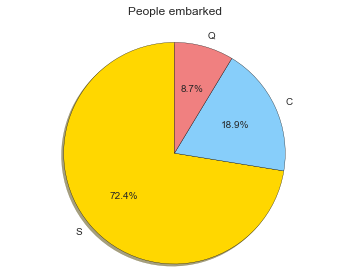

In [121]:
%pylab inline


# Pie chart of how many people are embarked at three different places

emb_tit = titanic_df.groupby('Embarked')

labels = 'S', 'C', 'Q'
sizes = [644, 168, 77]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0 ,0 ,0)

plt.title('People embarked', y = 1.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')


emb_tit.count()




Populating the interactive namespace from numpy and matplotlib


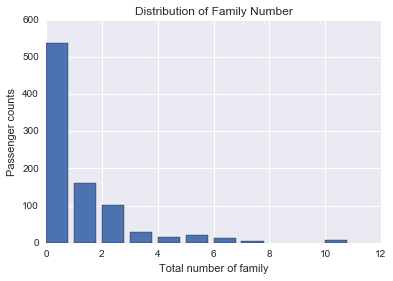

In [119]:
%pylab inline

Pclass_age = titanic_df.groupby(['Total'], as_index = False).count()

plt.bar(Pclass_age['Total'],Pclass_age['PassengerId'])
plt.title('Distribution of Family Number')
plt.xlabel('Total number of family')
plt.ylabel('Passenger counts')



Populating the interactive namespace from numpy and matplotlib


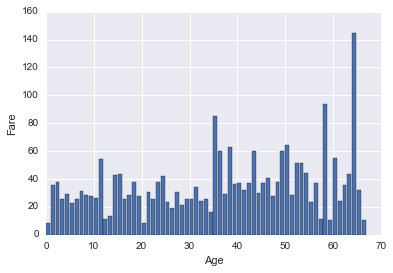

In [273]:
%pylab inline

# Age vs. Fare / Skipped over age 66, since I couldn't figure out the missing age values

Age_Fare = titanic_age.groupby('Age')['Fare'].mean()

Age_Fare[0:66]

x_age = np.arange(67)

plt.bar(x_age,Age_Fare[0:66])
plt.xlabel('Age')
plt.ylabel('Fare')




Populating the interactive namespace from numpy and matplotlib


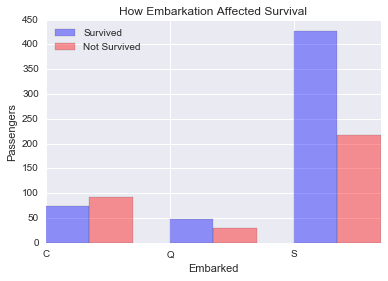

In [248]:
%pylab inline
sur_vs_emb = titanic_df.groupby(['Survived','Embarked']).count()

index = np.arange(3)
x = np.array([0,1,2])
my_xticks = ['C','Q','S']
plt.xticks(x, my_xticks)    
bar_width = 0.35

rects1 = plt.bar(x,sur_vs_emb['Total'][0], bar_width, alpha = 0.4, color = 'b', label = 'Survived')
rects2 = plt.bar(x+bar_width,sur_vs_emb['Total'][1], bar_width, alpha = 0.4, color = 'r', label = 'Not Survived')

plt.xlabel('Embarked')
plt.ylabel('Passengers')
plt.title('How Embarkation Affected Survival')
plt.legend(loc='upper left')



In [277]:
#I analyzed the Titanic data. 

#Questions I posed: 
 
#    Calculate how many people survived and how many didn't 
#    Calculate Survival vs. Age  / Pclass / SibSp / Parch / Fare 
#    Calculate what percentage different categorical data (Female / Male) (Pclass 1,2,3) (SibSp 0,1,2,3,4,5,8) (Parch 0,1,2,3,4,5,6) survived 
#    Calculate how different age group survived 
#    Calculate number of total family member and how it affected survival 

#    Draw plot of People embarked proportion 
#    Draw plot of distribution of total number of family 
#    Draw plot of Age vs Fare 
#    Draw plot of Embarkation vs Survival 
 
 
 
# The dataframe I used throughout the project is divided by the groupby() function with 'Survived' factor. 
# I did count() to count the survived and non-survived people, and mean() to compare the mean difference of
# other factors like age, Pclass, and Fare.  
# Mean comparison and categorical comparison were repetitive, so I created a function for each. 
# Then I made a conditional division of data, using titanic_df[titanic_df['Age'] < age] 
# Then I could calculate how different age group survived. 
# I used matplotlib bar() and pie() function to plot. 
# I added a new line 'Total' for total number of family member. Also, when total is not being used, it was 
# a good title to use when I used count(), because count() just calculated how many indexes there are.  

 
# The first thing I did before analyzing anything related to 'Age', I got rid of the NaN aged people by 
# using titanic_df.dropna(subset=['Age']). Also, there were decimal value ages like 0.83, and 0.92. Those
# decimal values were all rounded for convenience. But omitting data with NaN value in 'Age' misses too
# many people. Those people might tell us something about other correlations such as Pclass or SibSp. 
# So, if the calculation does not include 'Age' data, I just used the original data. I also added 'SibSp' 
# and 'Parch' and made a new column 'Total' to 'groupby' total number of family and saw how it is related 
# to survival.  
 
# The below are summary statistics and plots communicating your final results. 
# The statistics are round values, first element = not survived / second element = survived. 
 
# Just mean calculation showed lower age (30.6, 28.3), higher Pclass (2.5, 2.0), less siblings/spouses 
# (0.55, 0.47), more parents/children (0.33, 0.46), more fare (22.1, 48.4) led to better survival. Age 
# should be an important factor in this data, but there were many people with no age information. The 
# large number of missing values would have changed the results of the data analysis. The data related 
# to age would not be very accurate with the data given.  

# When I divided each group with groupby(), the results weren't exactly the same. 
# Sex looks like the most significant factor. 74% female survived while only 19% male survived. 
# For Pclass, definitely, the higher class survived better than the lower (1: 63%, 2: 47%, 3: 24%).  
# For Siblings/Spouses, lower wasn't always better. Having no SibSp (0: 34%) didn't survive better than 
# having one. (1: 54%). For Parents/Children, same result. (0: 34%, 1: 55%). The best is having three 
# Parents/Children (Parch 3: 60%). But certainly, having too many lowered the survival rate. By looking 
# at the total number of family( SibSp + Parch ), the survival rate rose from zero (30.3%) to three 
# (72.4%) family members, but declined from four, and no one survived with more than seven family members. 
# I think the data would be more informative, if the four data of Siblings, Spouses, Parents, and 
# Children are all separated.

# Younger people survived better. (Under 10: 61%, Over 60: 27%) 

# The Age and fare didn’t have strong correlation, but just by looking at the graph, 0-30 aged people paid
# less (~15 pounds) than 30-60 aged people.  
# I don't have an idea of how the ship looks like, but some embarkation had better survival rate than 
# others. Just by looking at the graph, S which has the most number of people had the best chance of 
# survival. S must have had more boats, but the given data doesn't tell us that. 
 
 
 
 
 
# A list of Web sites, books, forums, blog posts, github repositories, etc. that you referred to: 
  
# https://www.kaggle.com/c/titanic/data 
# http://matplotlib.org/api/pyplot_api.html 
# http://stackoverflow.com/questions/13747860/plot-specific-columns-and-rows-from-a-file-with-pylab 
# http://stackoverflow.com/questions/31609600/jupyter-ipython-notebook-not-plotting 
# http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline 
# http://stackoverflow.com/questions/12018992/print-combining-strings-and-numbers 
# http://stackoverflow.com/questions/18106975/compare-float-and-float64-in-python 
# http://stackoverflow.com/questions/14847457/how-do-i-find-the-length-or-dimensions-size-of-a-numpy-matrix-in-python 
# http://stackoverflow.com/questions/16970982/find-unique-rows-in-numpy-array 
# http://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe 
# http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-of-certain-column-is-nan 
# http://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas 
# http://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny 
# http://matplotlib.org/examples/pylab_examples/barchart_demo.html 
# https://plot.ly/matplotlib/bar-charts/ 
# http://stackoverflow.com/questions/30413789/matplotlib-automatic-legend-outside-plot 
 